In [15]:
#data ảnh
!gdown 1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
!gdown 1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
!gdown 1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07

Downloading...
From: https://drive.google.com/uc?id=1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
To: /content/GreenBackground.png
100% 5.51k/5.51k [00:00<00:00, 16.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
To: /content/NewBackground.jpg
100% 64.3k/64.3k [00:00<00:00, 5.35MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07
To: /content/Object.png
100% 51.0k/51.0k [00:00<00:00, 78.4MB/s]


In [43]:
import numpy as np

#Bài tập tự luận:
#Câu 1a:
def compute_vector_length(vector):
    result = np.sqrt(np.sum(vector**2))
    return result

#Câu 1b:
def compute_dot_product(vector1, vector2):
    mul_vector = vector1 * vector2
    result = np.sum(mul_vector)
    return result

#Câu 1c:
def matrix_multi_vector(matrix, vector):
    if matrix.shape[1] != vector.shape[0]:
        raise ValueError("Matrix columns must match vector length")

    result = np.dot(matrix, vector)

    return result

#Câu 1d:
def matrix_multi_matrix(matrix1, matrix2):
    return np.dot(matrix1, matrix2)


1e. **Calculate the determinant of A**:
$$
\text{det}(A) = ad - bc = (-2)(-4) - (6)(8) = -40
$$
Since $\text{det}(A) \neq 0$, the matrix is invertable

$$
A^{-1} = \frac{1}{\text{det}(A)} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix} = \frac{1}{-40} \begin{pmatrix} -4 & -6 \\ -8 & -2 \end{pmatrix} =  \begin{pmatrix} 0.1 & 0.15 \\ 0.2 & 0.05 \end{pmatrix}
$$

In [45]:
#Câu 1e:

def matrix_inverse(matrix):
  det_matrix = np.linalg.det(matrix)
  if det_matrix == 0:
    raise ValueError("Matrix is singular and cannot be inverted.")
  return np.linalg.inv(matrix)

matrix = np.array([[-2,6], [8, -4]])
inverse_matrix = matrix_inverse(matrix)
print(inverse_matrix)

[[0.1  0.15]
 [0.2  0.05]]


#Câu 2:
$$
\text{det}(A - \lambda I) = \begin{vmatrix}
   0.9 - \lambda & 0.2 \\
   0.1 & 0.8 - \lambda
   \end{vmatrix} = 0
$$
Solve the quadratic equation:
$$
\rightarrow \lambda _ 1 = 1, \lambda _ 2 = 0.7
$$
**Find the eigenvectors v for each eigenvalue:**
Solve $\text{det}(A - \lambda I) v = 0$:
$$
\begin{pmatrix}
   0.9 - 1 & 0.2 \\
   0.1 & 0.8 - 1
   \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = 0
→  v_1 = 2v_2
$$



In [36]:
#Bài tập tự luận:
#Câu 2:

import numpy as np
import math


def solve_quadratic_equation(a, b, c):
    delta = b**2 - 4*a*c
    x1 = (-b + math.sqrt(delta)) / (2*a)
    x2 = (-b - math.sqrt(delta)) / (2*a)
    return x1, x2


def compute_eigenvalues_eigenvectors(matrix):
    a = 1
    b = -(matrix[0, 0] + matrix[1, 1])
    c = matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]

    z1, z2 = solve_quadratic_equation(a, b, c)

    eigenvalues = [z1, z2]
    eigenvectors = []

    for eigenvalue in eigenvalues:

        A_lambda_I = matrix - np.eye(matrix.shape[0]) * eigenvalue

        u, s, vh = np.linalg.svd(A_lambda_I)
        null_space = np.compress(s <= 1e-10, vh, axis=0)
        eigenvector = null_space[0]

        eigenvector = eigenvector / np.linalg.norm(eigenvector)

        eigenvectors.append(eigenvector)

    return eigenvalues, np.array(eigenvectors).T


if __name__ == "__main__":
    matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
    eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
    print("Eigenvalues:")
    for value in eigenvalues:
        print(round(value, 2))
    print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
1.0
0.7
Eigenvectors:
 [[-0.89442719 -0.70710678]
 [-0.4472136   0.70710678]]


#Câu 3:

$$
x \cdot y = 1 + 0 + 9 + 0 = 10 \\
||x|| = \sqrt{1^2 + 2^2 + 3^2 + 4^2} = \sqrt{30} \\
||y|| = \sqrt{1^2 + 0^2 + 3^2 + 0^2} = \sqrt{10}\\
\rightarrow \text{cs}(x, y) = \frac{10}{\sqrt{30} \cdot \sqrt{10}} = \frac{\sqrt{3}}{3}
$$

In [32]:
#Bài tập tự luận:
#Câu 3:
import numpy as np


def compute_cosine(v1, v2):
    v1_pow = v1 ** 2
    v2_pow = v2 ** 2
    v1_v2_sum = np.sum(v1 * v2)

    v1_square = np.sqrt(np.sum(v1_pow))
    v2_square = np.sqrt(np.sum(v2_pow))

    result = v1_v2_sum / (v1_square * v2_square)

    return result


if __name__ == "__main__":
    x = np.array([1, 2, 3, 4])
    y = np.array([1, 0, 3, 0])
    result = compute_cosine(x, y)
    print(round(result, 8))

0.57735027


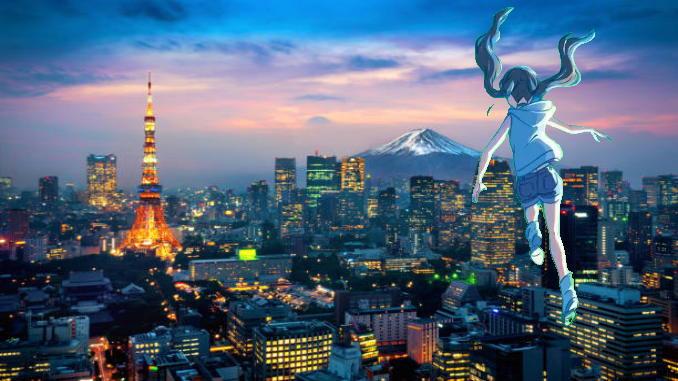

In [28]:
#Bài tập tự luận:
#Câu 4:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

def compute_difference(bg_img, input_img):
    difference = cv2.absdiff(bg_img, input_img)
    difference_single_channel = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    return difference_single_channel


def compute_binary_mask(difference_single_channel):
    _, difference_binary = cv2.threshold(
        difference_single_channel, 50, 255, cv2.THRESH_BINARY)
    return difference_binary


def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask[:, :, np.newaxis]
                      == 255, ob_image, bg2_image)
    return output


if __name__ == "__main__":

    bg1_image = cv2.imread('/content/GreenBackground.png', 1)
    bg1_image = cv2.resize(bg1_image, (678, 381))

    ob_image = cv2.imread('/content/Object.png', 1)
    ob_image = cv2.resize(ob_image, (678, 381))

    bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
    bg2_image = cv2.resize(bg2_image, (678, 381))

    difference_single_channel = compute_difference(bg1_image, ob_image)

    output_image = replace_background(bg1_image, bg2_image, ob_image)

    cv2_imshow(output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()